# CS-E-106: Data Modeling
## Fall 2019: HW 05

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics import gofplots
import pylab


**Solution 1:**

**(a)**

In [3]:
plastic_data = pd.read_csv("data/Plastic Hardness.csv")

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.matrix.html

https://www.python-course.eu/matrix_arithmetic.php

**(1)**

In [20]:
X_0 = np.ones(plastic_data.shape[0]).reshape(16,1)
X_1 = np.array(plastic_data["X"]).reshape(16,1)
X = np.matrix(np.hstack((X_0, X_1)))

In [21]:
X_T = X.T
XTX = X_T * X
XTX_inv = XTX.I
XTX_inv

matrix([[ 0.675     , -0.021875  ],
        [-0.021875  ,  0.00078125]])

$$
(X'X)^{-1} = 
\begin{pmatrix} 
\frac{1}{n}+\frac{\bar{X}^2}{\sum{(X_{i}-\bar{X})^2}} & \frac{-\bar{X}}{\sum{(X_{i}-\bar{X})^2}}\\
\frac{-\bar{X}}{\sum{(X_{i}-\bar{X})^2}} & \frac{1}{\sum{(X_{i}-\bar{X})^2}}
\end{pmatrix}
$$

**(2)**

$b = (X'X)^{-1}X'Y$

In [23]:
Y = np.matrix(plastic_data["Y"]).reshape(16,1)
b = XTX_inv*X_T*Y
b

matrix([[168.6     ],
        [  2.034375]])

**(3)**

Normal error regression model:
$Y_{i} = \beta_{0}+\beta_{1}X_{i}+\epsilon_{i}$


$$
\therefore \hat{Y} = X \beta
$$

In [24]:
YHat = X*b
YHat

matrix([[201.15 ],
        [201.15 ],
        [201.15 ],
        [201.15 ],
        [217.425],
        [217.425],
        [217.425],
        [217.425],
        [233.7  ],
        [233.7  ],
        [233.7  ],
        [233.7  ],
        [249.975],
        [249.975],
        [249.975],
        [249.975]])

**(4)**

$\implies H = X(X'X)^{-1}X'$

In [25]:
H = X*XTX_inv*X_T
H

matrix([[ 0.175,  0.175,  0.175,  0.175,  0.1  ,  0.1  ,  0.1  ,  0.1  ,
          0.025,  0.025,  0.025,  0.025, -0.05 , -0.05 , -0.05 , -0.05 ],
        [ 0.175,  0.175,  0.175,  0.175,  0.1  ,  0.1  ,  0.1  ,  0.1  ,
          0.025,  0.025,  0.025,  0.025, -0.05 , -0.05 , -0.05 , -0.05 ],
        [ 0.175,  0.175,  0.175,  0.175,  0.1  ,  0.1  ,  0.1  ,  0.1  ,
          0.025,  0.025,  0.025,  0.025, -0.05 , -0.05 , -0.05 , -0.05 ],
        [ 0.175,  0.175,  0.175,  0.175,  0.1  ,  0.1  ,  0.1  ,  0.1  ,
          0.025,  0.025,  0.025,  0.025, -0.05 , -0.05 , -0.05 , -0.05 ],
        [ 0.1  ,  0.1  ,  0.1  ,  0.1  ,  0.075,  0.075,  0.075,  0.075,
          0.05 ,  0.05 ,  0.05 ,  0.05 ,  0.025,  0.025,  0.025,  0.025],
        [ 0.1  ,  0.1  ,  0.1  ,  0.1  ,  0.075,  0.075,  0.075,  0.075,
          0.05 ,  0.05 ,  0.05 ,  0.05 ,  0.025,  0.025,  0.025,  0.025],
        [ 0.1  ,  0.1  ,  0.1  ,  0.1  ,  0.075,  0.075,  0.075,  0.075,
          0.05 ,  0.05 ,  0.05 ,  0.05 ,  0.0

**(5)**

$$
e = \begin{pmatrix} 
\epsilon_{1}\\
\epsilon_{2}\\
.\\
.\\
.\\
\epsilon_{n}
\end{pmatrix} 
= 
Y - \hat{Y} = Y-X'b
$$

$$
SSE = e'e = (Y-Xb)'(Y-Xb) = Y'Y-b'X'Y
$$

In [26]:
SSE = Y.T*Y-b.T*X_T*Y
SSE

matrix([[146.425]])

**(6)**

$$
s^{2}{b} = MSE(X'X)^{-1} = \begin{pmatrix} 
\frac{MSE}{n}+\frac{MSE\bar{X}^2}{\sum{(X_{i}-\bar{X})^2}} & \frac{-\bar{X}MSE}{\sum{(X_{i}-\bar{X})^2}}\\
\frac{-\bar{X}MSE}{\sum{(X_{i}-\bar{X})^2}} & \frac{MSE}{\sum{(X_{i}-\bar{X})^2}}
\end{pmatrix}
$$

In [27]:
n = plastic_data.shape[0]
p = X.shape[1]
MSE = SSE/(n-p)
s2_b = MSE[0,0]*XTX_inv
s2_b

matrix([[ 7.05977679, -0.22878906],
        [-0.22878906,  0.00817104]])

**(7)**

$$
s^2{pred} = MSE(1+X'_{h}(X'X)^{-1}X_{h})
$$

At $X_{h}=30$,

In [30]:
Xh = np.matrix([1,30]).reshape(2,1)
s2_pred = MSE*(1+Xh.T*XTX_inv*Xh)
s2_pred

matrix([[11.14529576]])

**(b)**

$$
\sigma^{2}{b} = \begin{pmatrix} 
\sigma^{2}(b_{0}) & \sigma(b_{0},b_{1})\\
\sigma(b_{0},b_{1}) & \sigma^{2}(b_{1})
\end{pmatrix}
$$
Thus, from part(a)(6):

$s^2(b_{0}) = 7.0597768$

$s(b_{0}, b_{1}) = -0.228789063$

$s^2(b_{1}) = 0.008171038$

**(c)**

$\implies SSE = Y'(I-H)Y$

https://docs.scipy.org/doc/numpy/reference/generated/numpy.identity.html

In [31]:
I = np.identity(16)
SSE = Y.T*(I-H)*Y
SSE

matrix([[146.425]])

**Latex Matrix Algebra for Q.1**

**(a)**

**(1)**

$$ 
X'X = 
\begin{pmatrix} 
n & \sum{X_{i}}\\
\sum{X_{i}} & \sum{X_{i}^{2}}
\end{pmatrix}
$$

Using rule 5.22:
$a = n$
$b = c = \sum{X_{i}}$
$d = \sum{X_{i}^{2}}$

$D = n\sum{X_{i}^{2}} - (\sum{X_{i}})(\sum{X_{i}} = n[\sum{X_{i}^{2}} - \frac{(\sum{X_{i}})^{2}}{n}]) = n\sum{(X_{i}-\bar{X)}^{2}}$


$$ 
(X'X)^{-1} = 
\begin{pmatrix} 
\frac{\sum{X_{i}^{2}}}{n\sum{(X_{i}-\bar{X})^2}} & \frac{-\sum{X_{i}}}{n\sum{(X_{i}-\bar{X})^2}}\\
\frac{-\sum{X_{i}}}{n\sum{(X_{i}-\bar{X})^2}} & \frac{n}{n\sum{(X_{i}-\bar{X})^2}}
\end{pmatrix}
$$

However, $\sum{X_{i}} = n\bar{X}$ and $\sum{(X_{i}-\bar{X})}^2=\sum{X_{i}^2}-n\bar{X}^2$


$$
(X'X)^{-1} = 
\begin{pmatrix} 
\frac{1}{n}+\frac{\bar{X}^2}{\sum{(X_{i}-\bar{X})^2}} & \frac{-\bar{X}}{\sum{(X_{i}-\bar{X})^2}}\\
\frac{-\bar{X}}{\sum{(X_{i}-\bar{X})^2}} & \frac{1}{\sum{(X_{i}-\bar{X})^2}}
\end{pmatrix}
$$

**(2)**

$nb_{0}+b_{1}\sum{X_{i}} = \sum{Y_{i}}$

$b_{0}\sum{X_{i}}+b_{1}\sum{X_{i}^2} = \sum{X_{i}Y_{i}}$

$\implies X'Xb = X'Y$

$\implies b = (X'X)^{-1}X'Y$

**(3)**

Normal error regression model:
$Y_{i} = \beta_{0}+\beta_{1}X_{i}+\epsilon_{i}$

$$
Y 
= 
\begin{pmatrix} 
Y_{1}\\
Y_{2}\\
.\\
.\\
.\\
Y_{n}
\end{pmatrix}
$$

$$
X = \begin{pmatrix} 
1 & X_{1}\\
1 & X_{1}\\
. & .\\
. & .\\
. & .\\
1 & X_{n}
\end{pmatrix}
$$

$$
\beta = 
\begin{pmatrix} 
\beta_{0}\\
\beta_{1}
\end{pmatrix}
$$

$$
\epsilon = \begin{pmatrix} 
\epsilon_{1}\\
\epsilon_{2}\\
.\\
.\\
.\\
\epsilon_{n}
\end{pmatrix}
$$

$$
\begin{pmatrix} 
Y_{1}\\
Y_{2}\\
.\\
.\\
.\\
Y_{n}
\end{pmatrix} = 
\begin{pmatrix} 
1 & X_{1}\\
1 & X_{1}\\
. & .\\
. & .\\
. & .\\
1 & X_{n}
\end{pmatrix} 
$$

$$
\begin{pmatrix} 
\beta_{0}\\
\beta_{1}
\end{pmatrix} 
+ 
\begin{pmatrix} 
\epsilon_{1}\\
\epsilon_{2}\\
.\\
.\\
.\\
\epsilon_{n}
\end{pmatrix}
$$

$$
\therefore \hat{Y} = X \beta
$$


**(4)**


$$
\hat{Y} = \begin{pmatrix} 
Y_{1}\\
Y_{2}\\
.\\
.\\
.\\
Y_{n}
\end{pmatrix}
$$

$= Xb = X(X'X)^{-1}X'Y = HY$

$\implies H = X(X'X)^{-1}X'$

**(5)**

$$
e = \begin{pmatrix} 
\epsilon_{1}\\
\epsilon_{2}\\
.\\
.\\
.\\
\epsilon_{n}
\end{pmatrix} 
= 
Y - \hat{Y} = Y-X'b
$$

$$
SSE = e'e = (Y-Xb)'(Y-Xb) = Y'Y-b'X'Y
$$

**(6)**

$$
\sigma^{2}{b} = \sigma^{2}(X'X)^{-1}
$$
$$
\sigma^{2}{b} = \begin{pmatrix} 
\frac{\sigma^{2}}{n}+\frac{\sigma^{2}\bar{X}^2}{\sum{(X_{i}-\bar{X})^2}} & \frac{-\bar{X}\sigma^{2}}{\sum{(X_{i}-\bar{X})^2}}\\
\frac{-\bar{X}\sigma^{2}}{\sum{(X_{i}-\bar{X})^2}} & \frac{\sigma^{2}}{\sum{(X_{i}-\bar{X})^2}}
\end{pmatrix}
$$

$$
s^{2}{b} = MSE(X'X)^{-1} = \begin{pmatrix} 
\frac{MSE}{n}+\frac{MSE\bar{X}^2}{\sum{(X_{i}-\bar{X})^2}} & \frac{-\bar{X}MSE}{\sum{(X_{i}-\bar{X})^2}}\\
\frac{-\bar{X}MSE}{\sum{(X_{i}-\bar{X})^2}} & \frac{MSE}{\sum{(X_{i}-\bar{X})^2}}
\end{pmatrix}
$$

**(7)**

$$
s^2{pred} = MSE(1+X'_{h}(X'X)^{-1}X_{h})
$$

At $X_{h}=30$,

$s^2{pred} = MSE(1+30^2(X'X)^{-1})$

**Solution 2:**

**(a)**

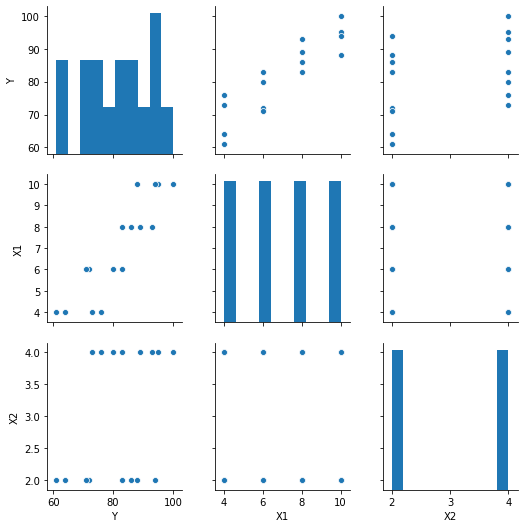

In [3]:
brand_data = pd.read_csv("data/Brand Preference.csv")
sns.pairplot(data=brand_data)

In [5]:
corr_mat = brand_data.corr()
corr_mat

,Y,X1,X2
Y,1.000000,0.892393,0.394581
X1,0.892393,1.000000,0.000000
X2,0.394581,0.000000,1.000000


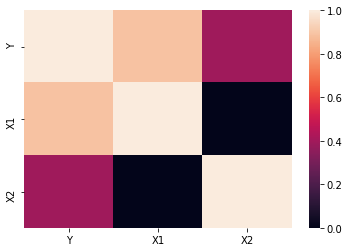

In [7]:
sns.heatmap(corr_mat)

*Interpretation:*

We can see a linear relationship between X1 and Y ($r \approx 0.9$). However, there seems to be little correlation between X2 and Y, or X2 and X1 either.

**(b)**

In [11]:
lm_brand = ols("Y~X1+X2", data=brand_data).fit()
lm_brand.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.945   
Dependent Variable: Y                AIC:                79.7883 
Date:               2019-11-03 13:49 BIC:                82.1061 
No. Observations:   16               Log-Likelihood:     -36.894 
Df Model:           2                F-statistic:        129.1   
Df Residuals:       13               Prob (F-statistic): 2.66e-09
R-squared:          0.952            Scale:              7.2538  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     37.6500    2.9961  12.5663  0.0000  31.1773  44.1227
X1             4.4250    0.3011  14.6952  0.0000   3.7745   5.0755
X2             4.3750    0.6733   6.4976  0.0000   2.9204   5.8296
-----------------------------------------------------------------
Omnibus:              0.766        Durbin-Watson:           2.313
Prob(Omnibus):        0.682        Jarque-Bera (JB):        0.647
Skew:                 0.049        Prob(JB):                0.724
Kurtosis:             2.020        Condition No.:           36   
=================================================================

"""

Estimated Regression Function: $Y = 37.65+4.425*X1+4.375*X1$

*Interpretation:*

Based on the regression function, none of the $\beta$'s seem to be zero. $\beta_{2}$ does has a higher standard error and a greater p-value, which means X1 is more correlated to Y compared to X2. Also, the model is a very good fit ($R^2=0.95$).

**(c)**

Text(0.5, 1.0, 'Boxplot of Residuals')

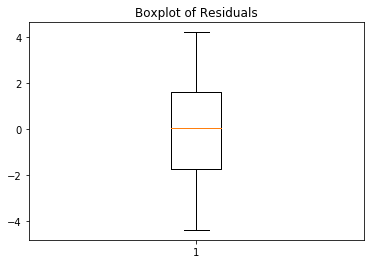

In [40]:
ei = lm_brand.resid
plt.boxplot(ei)
plt.title("Boxplot of Residuals")

*Interpretation:*

We see that we don't have any outliers in the error term based on the box plot. Also, it seems to be evenly spread around 0. 

**(d)**

Text(0, 0.5, 'Residuals')

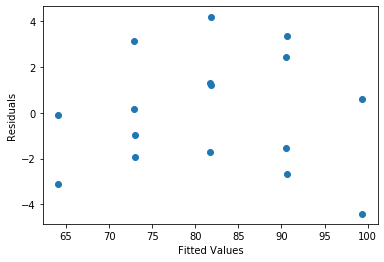

In [20]:
plt.scatter(lm_brand.fittedvalues, ei)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

Text(0, 0.5, 'Residuals')

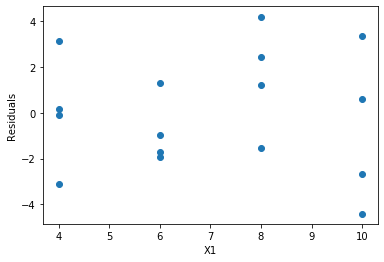

In [21]:
plt.scatter(brand_data["X1"], ei)
plt.xlabel("X1")
plt.ylabel("Residuals")

Text(0, 0.5, 'Residuals')

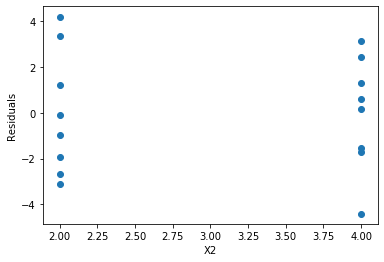

In [22]:
plt.scatter(brand_data["X2"], ei)
plt.xlabel("X2")
plt.ylabel("Residuals")

Text(0, 0.5, 'Residuals')

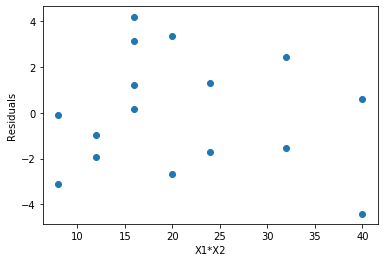

In [23]:
plt.scatter(brand_data["X1"]*brand_data["X2"], ei)
plt.xlabel("X1*X2")
plt.ylabel("Residuals")

In [31]:
df = brand_data
rse = np.sqrt(np.sum(ei**2)/lm_brand.df_resid) #sqrt(MSE), see below
rse

2.6932965217083233

In [33]:
np.sqrt(lm_brand.mse_resid)

2.6932965217083233

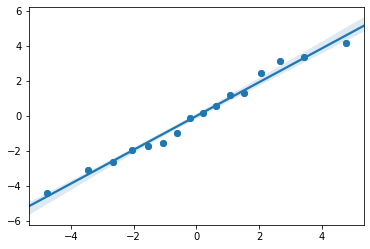

In [49]:
# normal probability plot, manually
ri = ei.rank()
n = df.shape[0]
zr = (ri-0.375)/(n+0.25)

#residual standard error from summary(lm) above
zr1 = rse*stats.norm.ppf(zr)

plt.scatter(zr1, ei)
sns.regplot(zr1, ei)

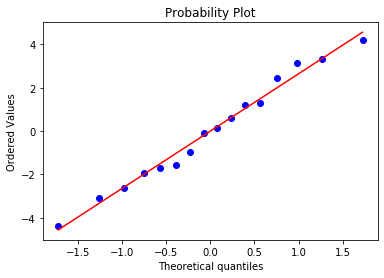

In [34]:
stats.probplot(ei, dist="norm", plot=pylab)
pylab.show()

*Interpretation:*

*Residual Plots:* The residuals appear to be equally spread and have no distinct patterns. We can say that there is contant variance in the error term.

*Normal Probability Plot:* The plot seems to be almost linear, which means that the error is in agreement with the normality. 

**(e)**

Null Hypothesis: $H_{0}$: Error variance is constant
Alternate Hypothesis: $H_{1}$: Error variance is not constant

In [51]:
ei2 = ei**2
f = ols("ei2~X1+X2", data=brand_data).fit()
f.summary2()

/home/srk-apts/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.006  
Dependent Variable: ei2              AIC:                106.2964
Date:               2019-11-03 14:26 BIC:                108.6142
No. Observations:   16               Log-Likelihood:     -50.148 
Df Model:           2                F-statistic:        0.9521  
Df Residuals:       13               Prob (F-statistic): 0.411   
R-squared:          0.128            Scale:              38.027  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept     1.1588    6.8599   0.1689  0.8685  -13.6611  15.9786
X1            0.9175    0.6894   1.3308  0.2061   -0.5720   2.4070
X2           -0.5625    1.5416  -0.3649  0.7211   -3.8930   2.7680
-----------------------------------------------------------------
Omnibus:              2.511        Durbin-Watson:           1.859
Prob(Omnibus):        0.285        Jarque-Bera (JB):        1.910
Skew:                 0.798        Prob(JB):                0.385
Kurtosis:             2.437        Condition No.:           36   
=================================================================

"""

In [52]:
#to find SSE(R) and SSR(R)
display(anova_lm(f))

#to find SSE(F) and SSR(F)
display(anova_lm(lm_brand))

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,67.344500,67.34450,1.770979,0.206132
X2,1.0,5.062500,5.06250,0.133130,0.721076
Residual,13.0,494.347225,38.02671,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,1566.45,1566.450000,215.947508,1.778029e-09
X2,1.0,306.25,306.250000,42.218982,2.011047e-05
Residual,13.0,94.30,7.253846,NaN,NaN


In [53]:
SSR_R = 67.34+5.06
SSE_R = 494.35 

SSR_F = 1566.45+306.25
SSE_F= 94.30

n = brand_data.shape[0]

#chi-squared: [SSR(R)/2] / [SSE(F)/n]^2  
chiTest = (SSR_R/2) / ((SSE_F/n))**2
print(chiTest)


#p 
chi = stats.chi2.ppf(1-0.05,1)
print(chi)


1.042137803922186
3.841458820694124


*Decision Rule:*

- If $chiTest \leq \chi^{2}(1-\alpha,1)$, conclude $H_{0}$: constant error variance

- If $chiTest > \chi^{2}(1-\alpha,1)$, conclude $H_{1}$: non-constant error variance 


*Result:*

Since $1.042138 \leq 3.841459$ i.e. $chiTest \leq \chi^{2}(1-\alpha,1)$, we conclude $H_{0}$. The error variance is constant.

**Solution 3:**

**(a)**

*Hypothesis:*

$H_0: \beta_k = 0$ 

$H_a: \beta_k \neq 0$ 


In [54]:
df_brand = lm_brand.df_resid
alpha = 0.01
anova_lm(lm_brand)

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,1566.45,1566.450000,215.947508,1.778029e-09
X2,1.0,306.25,306.250000,42.218982,2.011047e-05
Residual,13.0,94.30,7.253846,NaN,NaN


In [55]:
SSR_X1 = anova_lm(lm_brand)["sum_sq"]["X1"]
SSR_X2 = anova_lm(lm_brand)["sum_sq"]["X2"]
SSE = anova_lm(lm_brand)["sum_sq"]["Residual"]
MSR_X1 = SSR_X1/1
MSR_X2 = SSR_X2/1
MSE = SSE/df_brand

F_star_X1 = MSR_X1/MSE
print(F_star_X1)

F_star_X2 = MSR_X2/MSE
print(F_star_X2)

215.94750795334022
42.2189819724284


In [56]:
FTest = stats.f.ppf(1-alpha, 1, df_brand)
FTest

9.073805728515653

*Decision Rule:*

If $F^* \leq FTest$ , conclude $H_0$

If $F^* > FTest$ , conclude $H_a$


*Result:*

Since $F^*_{X1} and F^*_{X2}$ are both $> FTest$, we conclude $H_a$ i.e. both the $\beta_k$ are $neq$ 0. Thus, there exists a linear relation.


**(b)**

In [57]:
alpha = 0.01
g = len(lm_brand.params)
lm_brand.conf_int(alpha = alpha/g)

,0,1
Intercept,26.912447,48.387553
X1,3.345835,5.504165
X2,1.961914,6.788086


*Interpretation:*

Family confidence coefficient means that the obtained confidence intervals, for several $\beta_k$, are simultaneously accurate with a confidence coefficient of $1-\alpha = 99$%.

**(c)**

In [62]:
Xh = pd.DataFrame(np.array([5,4]).reshape(1,2), columns=["X1", "X2"])
Xh

,X1,X2
0,5,4


In [66]:
pred = lm_brand.get_prediction(Xh)
pred_df = pred.summary_frame(alpha=alpha) # shortcut for Bonferroni
pred_df

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,77.275,1.126687,73.881109,80.668891,68.48077,86.06923


*Interpretation:*

This means that the $E[Y_h]$ for the observations in $X_h$ are within the obtained interval with a confidence coeficient of $1-\alpha = 99$%, where all observations in $X_h$ are seen by our model.

**(d)**

`obs_ci_lower` and `obs_ci_upper` from above

*Interpretation:*

This means that the $E[Y_h]$ for the observations in $X_h$ are within the obtained interval with a confidence coeficient of $1-\alpha = 99$ %, where all observations in $X_h$ are new.

**Solution 4:**

**(a)**


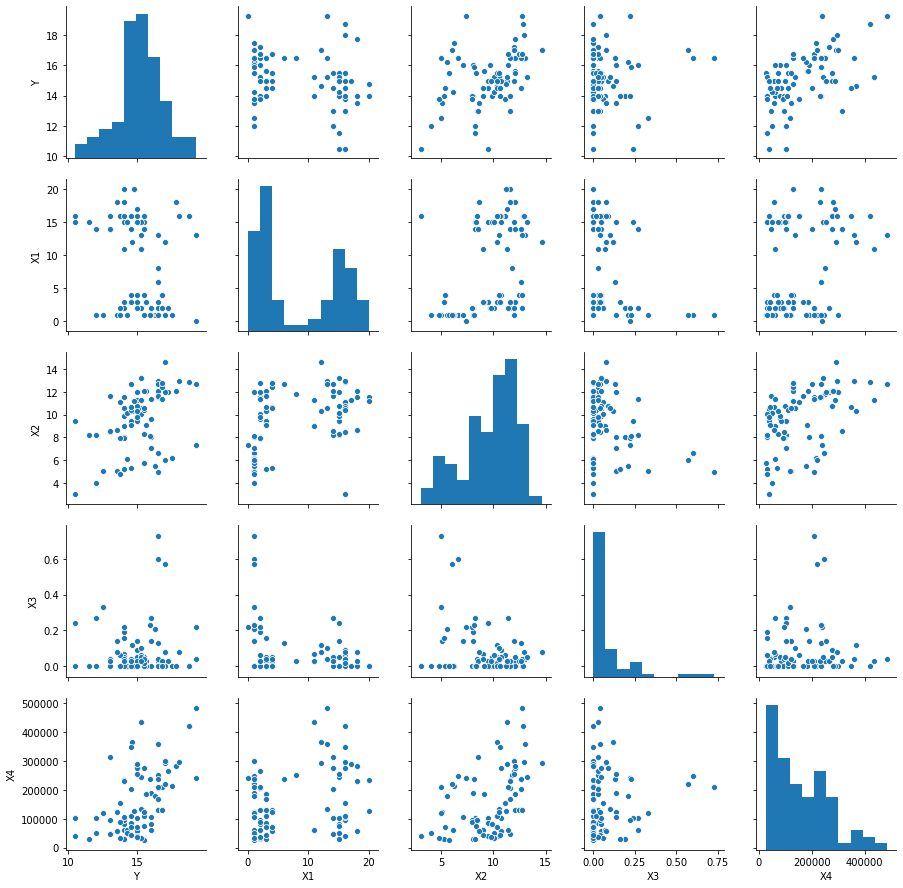

In [67]:
properties_data = pd.read_csv("data/Commercial Properties.csv")
sns.pairplot(properties_data)

In [70]:
corr_mat = properties_data.corr()
corr_mat

,Y,X1,X2,X3,X4
Y,1.000000,-0.250285,0.413787,0.066526,0.535262
X1,-0.250285,1.000000,0.388826,-0.252663,0.288583
X2,0.413787,0.388826,1.000000,-0.379762,0.440697
X3,0.066526,-0.252663,-0.379762,1.000000,0.080611
X4,0.535262,0.288583,0.440697,0.080611,1.000000


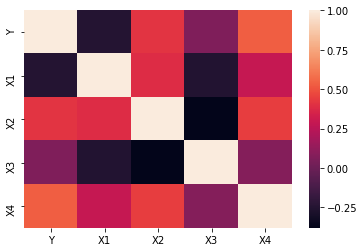

In [71]:
sns.heatmap(corr_mat)

*Interpretation:*

- There seems to be no 1:1 correlation in the data between any of the variables. 
- The highest 1:1 correlation being between X4 and Y. 
- We can see some clusters of data points in the plots for X1 and X3, showing that they are not equally spread.

**(b)**

In [88]:
# create formula to select all X variables (and exclude Y)
all_columns = list(properties_data.columns)
all_columns.remove("Y")
x_columns = "+".join(cols)
my_formula = "Y~" + x_columns

lm_prop = ols(my_formula, data=properties_data).fit()
lm_prop.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.563   
Dependent Variable: Y                AIC:                255.4904
Date:               2019-11-03 14:52 BIC:                267.4626
No. Observations:   81               Log-Likelihood:     -122.75 
Df Model:           4                F-statistic:        26.76   
Df Residuals:       76               Prob (F-statistic): 7.27e-14
R-squared:          0.585            Scale:              1.2925  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     12.2006    0.5780  21.1099  0.0000  11.0495  13.3517
X1            -0.1420    0.0213  -6.6549  0.0000  -0.1845  -0.0995
X2             0.2820    0.0632   4.4642  0.0000   0.1562   0.4078
X3             0.6193    1.0868   0.5699  0.5704  -1.5452   2.7839
X4             0.0000    0.0000   5.7224  0.0000   0.0000   0.0000
-----------------------------------------------------------------
Omnibus:              1.922       Durbin-Watson:          1.580  
Prob(Omnibus):        0.383       Jarque-Bera (JB):       1.301  
Skew:                 0.148       Prob(JB):               0.522  
Kurtosis:             3.545       Condition No.:          1743921
=================================================================
* The condition number is large (2e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

Regression Function: $Y = 12.2-0.142*X1+0.282*X2+0.6193*X3+7.924e-06*X4$


**(c)**

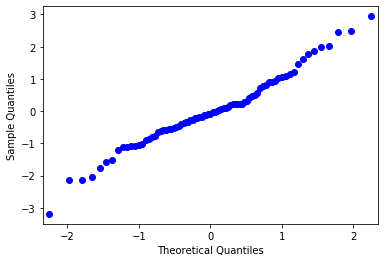

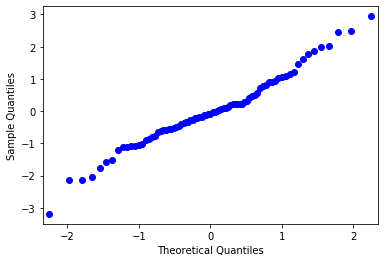

In [95]:
ei = lm_prop.resid
gofplots.qqplot(ei)

*Interpretation:* 

The QQ plot seems to be almost linear, which means that the error is in agreement with the normality. Distribution is fairly linear.

In [96]:
df = properties_data
rse = np.sqrt(lm_prop.mse_resid)

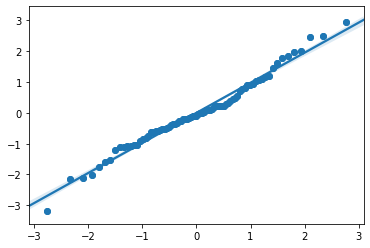

In [97]:
# normal probability plot, manually
ri = ei.rank()
n = df.shape[0]
zr = (ri-0.375)/(n+0.25)

#residual standard error from summary(lm) above
zr1 = rse*stats.norm.ppf(zr)

plt.scatter(zr1, ei)
sns.regplot(zr1, ei)

*Interpretation:* 

The normal probability plot also seems to be almost linear, which means that the error is in agreement with the normality. 

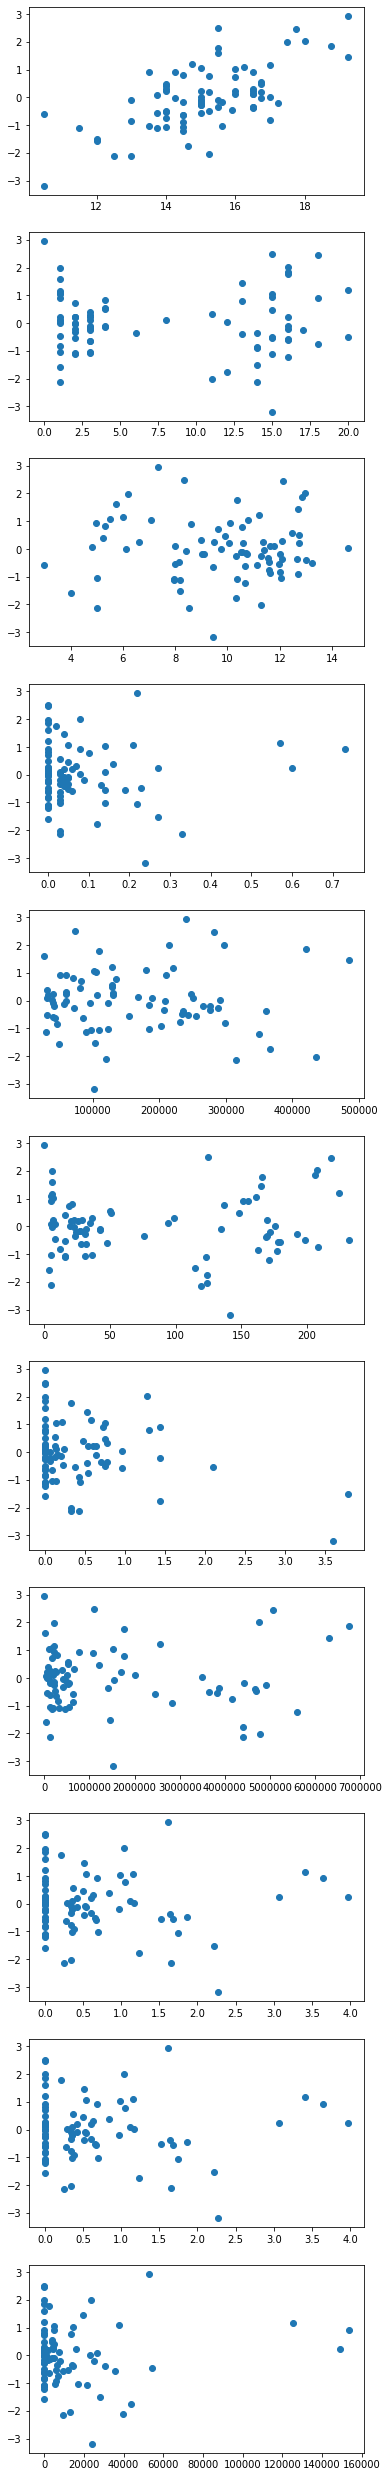

In [106]:
fig, ax = plt.subplots(11,1, figsize=(6,45))

ax[0].scatter(properties_data["Y"], ei)
ax[1].scatter(properties_data["X1"], ei)
ax[2].scatter(properties_data["X2"], ei)
ax[3].scatter(properties_data["X3"], ei)
ax[4].scatter(properties_data["X4"], ei)
ax[5].scatter(properties_data["X1"]*properties_data["X2"], ei)
ax[6].scatter(properties_data["X1"]*properties_data["X3"], ei)
ax[7].scatter(properties_data["X1"]*properties_data["X4"], ei)
ax[8].scatter(properties_data["X2"]*properties_data["X3"], ei)
ax[9].scatter(properties_data["X2"]*properties_data["X3"], ei)
ax[10].scatter(properties_data["X3"]*properties_data["X4"], ei)

*Interpretation:* 
- There is a linear pattern between residuals and Y, which could suggest that our linear model is not a good fit through out the data.
- We can see some clusters of data points in the plots for X1 and X3 and their respective interactions.
- For X2 and X4 and their interactions, the error variance is constant.


**(e)**

In [115]:
ei = pd.DataFrame(lm_prop.resid, columns=["ei"])
fitted_df = pd.DataFrame(lm_prop.fittedvalues, columns=["fitted_values"])
df = pd.concat((ei, fitted_df), axis=1)
df = df.sort_values(by="fitted_values")

Null Hypothesis: $H_{0}$: Error variance is constant
Alternate Hypothesis: $H_{1}$: Error variance is not constant

In [123]:
df1 = df[0:40]
df2 = df[41:df.shape[0]]

med1 = np.median(df1["ei"])
med2 = np.median(df2["ei"])

n1 = df1.shape[0]
n2 = df2.shape[0]

d1 = np.abs(df1["ei"]-med1)
d2 = np.abs(df2["ei"]-med2)

mean_d1 = np.mean(d1)
mean_d2 = np.mean(d2)

s2 = (np.var(d1)*(n1-1)+np.var(d2)*(n2-1))/(n1+n2-2)
print(s2)

#calculate s
s = np.sqrt(s2)
print(s)

#testStastic = (mean.d1 - mean.d2) / (s * sqrt((1/n1)+1/n2)
testStastic = (mean_d1-mean_d2)/(s*np.sqrt((1/n1)+(1/n2)))  
print(testStastic)

t = stats.t.ppf(1-0.05, 118)
print(t)

0.5393555160960213
0.7344082761625316
0.6009016468966987
1.6578695221021444


*Decision Rule:*

- If $|testStatistic| \leq t(1-\alpha/2,n-2)$, conclude $H_{0}$: constant error variance

- If $|testStatistic| > t(1-\alpha/2,n-2)$, conclude $H_{1}$: non-constant error variance 


*Result:*

Since $|0.6| \leq 1.65787$ i.e. $|testStatistic| \leq t(1-\alpha/2,n-2)$, we conclude $H_{0}$. The error variance is constant and thus does not vary with X.

**Solution 5:**

**(a)**


In [134]:
Xh_dict = {}
Xh_dict['X1'] = [4.0,6.0,12.0]
Xh_dict['X2'] = [10.0,11.5,12.5]
Xh_dict['X3'] = [0.1,0,0.32]
Xh_dict['X4'] = [80000,120000,340000]
Xh = pd.DataFrame(Xh_dict)

alpha = 0.05
g = Xh.shape[0]

In [135]:
Xh

,X1,X2,X3,X4
0,4.0,10.0,0.10,80000
1,6.0,11.5,0.00,120000
2,12.0,12.5,0.32,340000


In [136]:
pred = lm_prop.get_prediction(Xh)
pred_df = pred.summary_frame(alpha=alpha) # shortcut for Bonferroni
pred_df

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,15.148495,0.190898,14.768288,15.528702,12.852493,17.444497
1,15.542490,0.195229,15.153659,15.931322,13.245044,17.839936
2,16.913841,0.366657,16.183581,17.644102,14.534693,19.292990


*Interpretation:*

We see that the intervals are not too wide for the individual prediction intervals. We get an $R^2$ of 0.5847 which gives a somewhat of a good prediction.


In [137]:
pred = lm_prop.get_prediction(Xh)
pred_df = pred.summary_frame(alpha=alpha/g) # shortcut for Bonferroni
pred_df

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,15.148495,0.190898,14.681153,15.615838,12.326296,17.970694
1,15.542490,0.195229,15.064546,16.020434,12.718517,18.366464
2,16.913841,0.366657,16.016220,17.811463,13.989440,19.838242


*Bonferroni and Working-Hotelling Method:*

In [139]:
p = len(lm_prop.params)
n = properties_data.shape[0]
B = stats.t.ppf(1-alpha/(2*g), n-p)
print(B)
W = np.sqrt(2*stats.f.ppf(1-alpha,g,n-p))
print(W)
s = pred_df["mean_se"]
Yh = pred_df["mean"]

2.448123232394735
2.3344994839476474


In [142]:
pred_dict = dict()

pred_dict["X1"] = np.array(Xh["X1"])
pred_dict["X2"] = np.array(Xh["X2"])
pred_dict["X3"] = np.array(Xh["X3"])
pred_dict["X4"] = np.array(Xh["X4"])
pred_dict["fit"] = np.array(pred_df["mean"])
pred_dict["lower_B"] = np.array(Yh-B*s)
pred_dict["upper_B"] = np.array(Yh+B*s)
pred_dict["lower_W"] = np.array(Yh-W*s)
pred_dict["upper_W"] = np.array(Yh+W*s)

pd.DataFrame(pred_dict)

,X1,X2,X3,X4,fit,lower_B,upper_B,lower_W,upper_W
0,4.0,10.0,0.10,80000,15.148495,14.681153,15.615838,14.702843,15.594147
1,6.0,11.5,0.00,120000,15.542490,15.064546,16.020434,15.086729,15.998252
2,12.0,12.5,0.32,340000,16.913841,16.016220,17.811463,16.057881,17.769802
